In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import pandas as pd
from scipy.stats import logistic
%matplotlib inline
plt.rcParams['figure.figsize'] = [9, 6]

0.5 0.6224593312018546 0.3775406687981454 0.7310585786300049 0.8807970779778825 0.9525741268224334 0.9820137900379085 0.9933071490757153


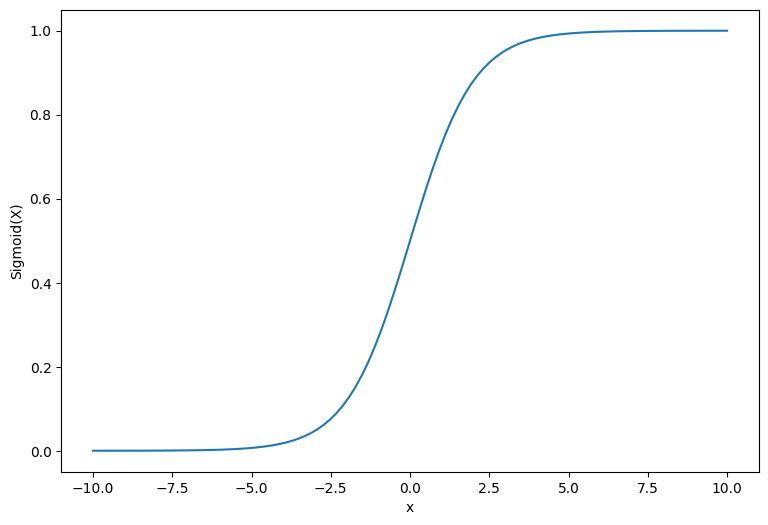

In [12]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

print(sigmoid(0),sigmoid(0.5),sigmoid(-0.5),sigmoid(1),sigmoid(2),sigmoid(3),sigmoid(4),sigmoid(5))

x = np.linspace(-10, 10, 100)
z = sigmoid(x)
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()


10 0 0


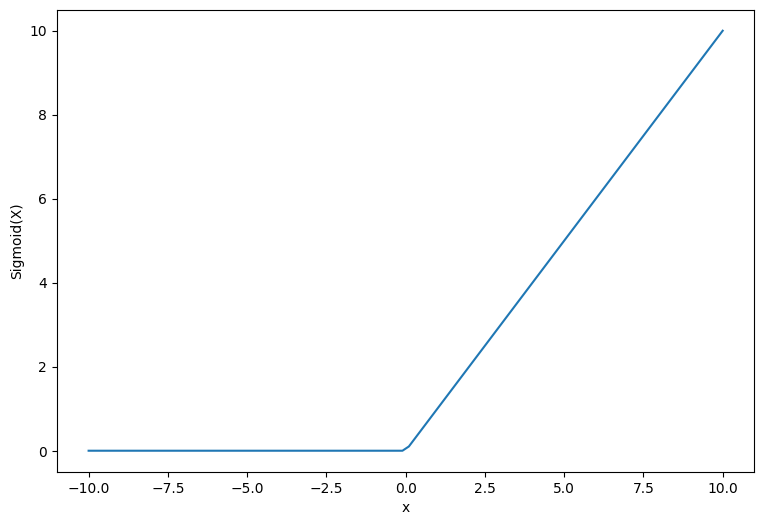

In [13]:
def relu(X):
   return np.maximum(0,X)
print(relu(10),relu(0),relu(-1))

x = np.linspace(-10, 10, 100)
z = relu(x)
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

In [14]:
relu([2,-3])

array([2, 0])

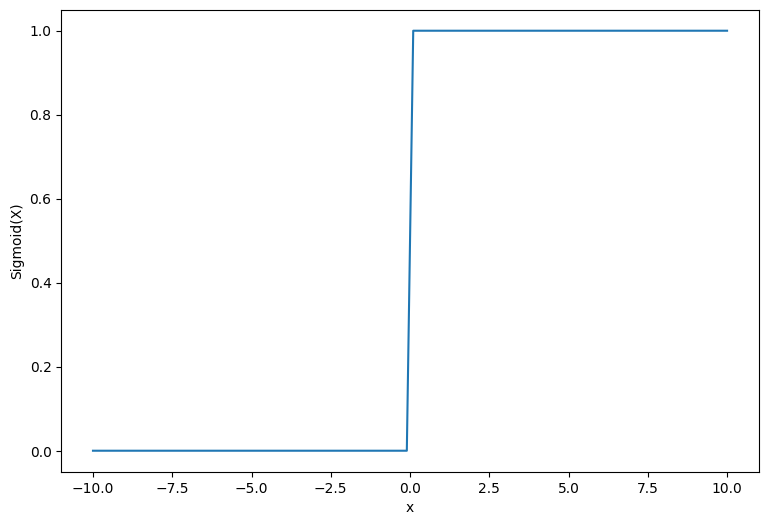

In [15]:
def relud(X):
   return np.maximum(0,np.sign(X))

x = np.linspace(-10, 10, 100)
z = relud(x)
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

In [16]:
relud([2,-3,0])

array([1, 0, 0])

In [17]:
# np.multiply elementwise matrix multiplication
# * normal matrix multiplication

a = np.matrix([[1,2], [3,4]])
print(a)
b = np.matrix([[5,6], [7,8]])
print(b)
print(a*b)
print(np.multiply(a,b))
a**2

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[19 22]
 [43 50]]
[[ 5 12]
 [21 32]]


matrix([[ 7, 10],
        [15, 22]])

In [18]:
X = [[23,12, 2,31,22,16,26,16,30,32,22,18,19,24,28,29,21,22,23,24,25,26,27,28,29,30], # temperatura e vento
     [ 5,20, 2,31, 2, 4, 4,20,20,30,19, 7, 3, 5,12,16, 5,10,15,10, 5, 0,10,20,15, 2]]
Y = [[ 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]] # ir à praia

X=np.array(X)
print(np.shape(X))
Y=np.array(Y)
np.shape(Y)

(2, 26)


(1, 26)

In [19]:
W=[0.002,0.0015] # coeficientes do neurónio
W=np.array(W)
W=np.reshape(W,(2,1))
np.shape(W)

(2, 1)

In [20]:
b=1

In [21]:
Z=np.dot(W.T,X)+b
print(Z) # estimador linear

[[1.0535 1.054  1.007  1.1085 1.047  1.038  1.058  1.062  1.09   1.109
  1.0725 1.0465 1.0425 1.0555 1.074  1.082  1.0495 1.059  1.0685 1.063
  1.0575 1.052  1.069  1.086  1.0805 1.063 ]]


In [22]:
A=logistic.cdf(Z) #classificação binária (probabilidade)
print(A)

[[0.74144643 0.74154227 0.73243263 0.75184936 0.7401984  0.73846392
  0.74230816 0.74307256 0.74838172 0.75194263 0.74507206 0.74010224
  0.73933209 0.74182965 0.74535686 0.74687228 0.74067887 0.7424994
  0.74431155 0.74326343 0.7422125  0.74115877 0.7444067  0.74762775
  0.74658859 0.74326343]]


In [23]:
dZ=A-Y #diferenças para o real

In [24]:
dZ

array([[-0.25855357,  0.74154227,  0.73243263,  0.75184936, -0.2598016 ,
         0.73846392, -0.25769184,  0.74307256, -0.25161828,  0.75194263,
         0.74507206,  0.74010224,  0.73933209, -0.25817035, -0.25464314,
         0.74687228,  0.74067887,  0.7424994 ,  0.74431155,  0.74326343,
        -0.2577875 , -0.25884123, -0.2555933 ,  0.74762775,  0.74658859,
        -0.25673657]])

In [25]:
dW=1/(np.shape(Y)[1])*np.dot(X,dZ.T) # 10 elementos no conjunto de treino , derivadas nos coeficientes para otimizar
print(dW)
db=1/(np.shape(Y)[1])*np.sum(dZ)
print(db)
lr=0.002 #learning rate

[[7.2797763]
 [5.8760895]]
0.35870054843836435


In [26]:
W=W-lr*dW # coeficientes atualizados
b=b-lr*db    

In [27]:
(W,b)

(array([[-0.01255955],
        [-0.01025218]]),
 0.9992825989031233)

It2

In [28]:
X = [[25, 12, 25,26,27,13,19,16,30, 32], # temperatura e vento
     [8,   0, 20,25, 10, 4, 4,12, 5, 10]]
Y=[  [1,   0,  0, 0, 1, 0, 0,0,  1, 1]] # ir à praia
Y=np.array(Y)
np.shape(Y)

(1, 10)

In [29]:
Z=np.dot(W.T,X)+b
print(Z)
A=logistic.cdf(Z)
print(A)
dZ=A-Y
print(dZ)
dW=1/(np.shape(Y)[1])*np.dot(X,dZ.T)
print(dW)
db=1/(np.shape(Y)[1])*np.sum(dZ)
print(db)
lr=0.02 #learning rate
W=W-lr*dW
b=b-lr*db
(W,b)

[[0.60327635 0.84856797 0.4802502  0.41642976 0.55765289 0.7949997
  0.71964238 0.67530361 0.57123513 0.49485513]]
[[0.64640553 0.70026665 0.61780696 0.60262861 0.63590929 0.68890385
  0.67252826 0.66268971 0.63904813 0.62124951]]
[[-0.35359447  0.70026665  0.61780696  0.60262861 -0.36409071  0.68890385
   0.67252826  0.66268971 -0.36095187 -0.37875049]]
[[3.02346569]
 [2.8757932 ]]
0.24874364886285943


(array([[-0.07302887],
        [-0.06776804]]),
 0.9943077259258661)

In [30]:
dZ

array([[-0.35359447,  0.70026665,  0.61780696,  0.60262861, -0.36409071,
         0.68890385,  0.67252826,  0.66268971, -0.36095187, -0.37875049]])

In [31]:
X=[5,10]
Z=np.dot(W.T,X)+b
print(Z)
A=logistic.cdf(Z)
print(A)

[-0.04851704]
[0.48787312]


# 3 Neurons


In [126]:
X = pd.read_csv('dados_treino_diabetes.csv',
                          usecols=["gender","age","hypertension","heart_disease","bmi","HbA1c_level","blood_glucose_level"])

X = X[:1000]

X["gender"].replace('Female', 0, inplace=True)
X["gender"].replace('Male', 1, inplace=True)

X=np.array(X).T
print(np.shape(X))
Y=pd.read_csv('dados_treino_diabetes.csv',
                          usecols=[8])
Y=np.array(Y)
print(np.shape(Y))

W1 = np.random.rand(20,7)*(2/np.sqrt(20)).T
#W1 = np.zeros((3,7))
#for i in range(3):
#    for j in range(7):
#        W1[i][j] = np.random.uniform(-0.1, 0.1)

W2 = np.array([np.random.uniform(-0.1, 0.1, 20)])
W2 = np.reshape(W2,(1,20)) 

print(W1)
print(W2)

#b1=[0.2,0.1,-0.1, 0.5, 0.6, 0.2, 0.7, 0.8, 0.3, 0.1, 0.4, -0.6, 0.11, 0.23, 0.45, 0.99, 0.1, 0.43, 0.56]
b1 = np.random.rand(20,7)*(2/np.sqrt(20))
#b1=np.reshape(b1,(20,1))

b2=0.1

(7, 1000)
(100000, 1)
[[0.37462121 0.28071655 0.18300839 0.0313197  0.03974143 0.39469855
  0.36357828]
 [0.23709501 0.29857002 0.38012198 0.28450789 0.09967394 0.42305549
  0.32172819]
 [0.03747073 0.38371836 0.02071587 0.14611825 0.10886346 0.23185771
  0.30144435]
 [0.24685122 0.04707134 0.13971812 0.18692031 0.18253568 0.40527225
  0.13120128]
 [0.04061298 0.2618566  0.28502563 0.13329245 0.16194975 0.10119179
  0.34429779]
 [0.35047063 0.1688364  0.02153347 0.08992839 0.42409058 0.23037443
  0.30534126]
 [0.32953872 0.11125151 0.19610552 0.39427937 0.24801399 0.0619807
  0.05359464]
 [0.09686107 0.13727921 0.31136599 0.32856702 0.25751648 0.16936137
  0.33937884]
 [0.40073183 0.28747771 0.14920687 0.28794134 0.41950184 0.19574931
  0.2232086 ]
 [0.17231895 0.04521435 0.39992657 0.22283565 0.33210755 0.13517237
  0.0246132 ]
 [0.13576575 0.12069833 0.0491419  0.3904308  0.33618985 0.22769781
  0.30986306]
 [0.05177134 0.088994   0.19791837 0.27097671 0.3693628  0.37369931
  0.26688

In [93]:
#X = [[23,12, 2,31,22,16,26,16,30,32,22,18,19,24,28,29,21,22,23,24,25,26,27,28,29,30,10,8,6,12,14,11], # temperatura e vento
#     [ 5,20, 2,31, 2, 4, 4,20,20,30,19, 7, 3, 5,12,16, 5,10,15,10, 5, 0,10,20,15, 2, 0,2,4, 6, 3, 2]]
#Y = [[ 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,0,0, 0, 0, 0]] # ir à praia

X=np.array(X)
print(np.shape(X))
Y=np.array(Y)
np.shape(Y)

(100000, 7)


(100000, 1)

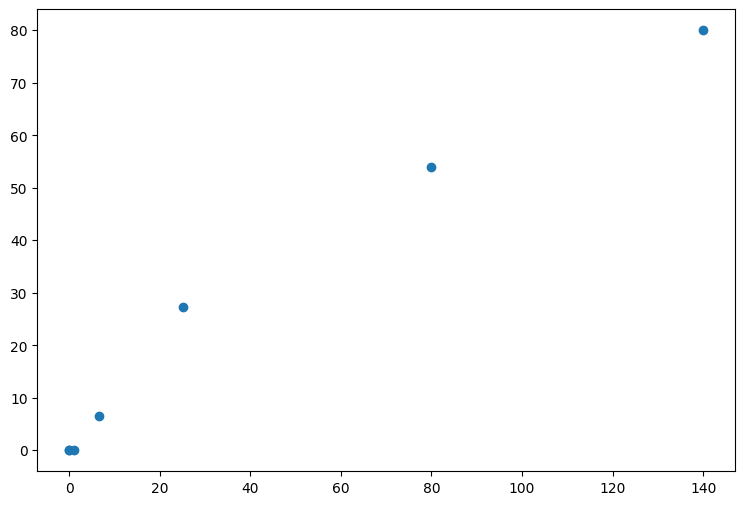

In [94]:
import matplotlib.pyplot as plt
plt.plot(X[0,:],X[1,:],'o')


In [76]:
#X*X

TypeError: can't multiply sequence by non-int of type 'str'

In [95]:
#X2=X*X
#np.sqrt(np.sum(X2[0,:])),np.sqrt(np.sum(X2[1,:]))

TypeError: can't multiply sequence by non-int of type 'str'

In [37]:
XN=X
XN[0,:]=X[0,:]-np.mean(X[0,:])
XN[1,:]=X[1,:]-np.mean(X[1,:])
XN

array([[  2,  -8, -18,  10,   1,  -4,   5,  -4,   9,  11,   1,  -2,  -1,
          3,   7,   8,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
        -10, -12, -14,  -8,  -6,  -9],
       [ -4,  10,  -7,  21,  -7,  -5,  -5,  10,  10,  20,   9,  -2,  -6,
         -4,   2,   6,  -4,   0,   5,   0,  -4,  -9,   0,  10,   5,  -7,
         -9,  -7,  -5,  -3,  -6,  -7]])

In [38]:
XN=np.zeros((2,32))

In [39]:
XN[0,:]=(X[0,:]-np.mean(X[0,:]))/np.std(X[0,:])
XN[1,:]=(X[1,:]-np.mean(X[1,:]))/np.std(X[1,:])
XN

array([[ 0.24268845, -1.09628229, -2.43525303,  1.31386504,  0.10879137,
        -0.560694  ,  0.64437967, -0.560694  ,  1.17996796,  1.44776211,
         0.10879137, -0.29289985, -0.15900278,  0.37658552,  0.91217381,
         1.04607089, -0.0251057 ,  0.10879137,  0.24268845,  0.37658552,
         0.51048259,  0.64437967,  0.77827674,  0.91217381,  1.04607089,
         1.17996796, -1.36407644, -1.63187059, -1.89966473, -1.09628229,
        -0.82848814, -1.23017937],
       [-0.52818664,  1.2246105 , -0.90378603,  2.60180826, -0.90378603,
        -0.65338644, -0.65338644,  1.2246105 ,  1.2246105 ,  2.47660846,
         1.09941071, -0.27778705, -0.77858623, -0.52818664,  0.22301214,
         0.72381132, -0.52818664, -0.02738746,  0.59861152, -0.02738746,
        -0.52818664, -1.15418562, -0.02738746,  1.2246105 ,  0.59861152,
        -0.90378603, -1.15418562, -0.90378603, -0.65338644, -0.40298684,
        -0.77858623, -0.90378603]])

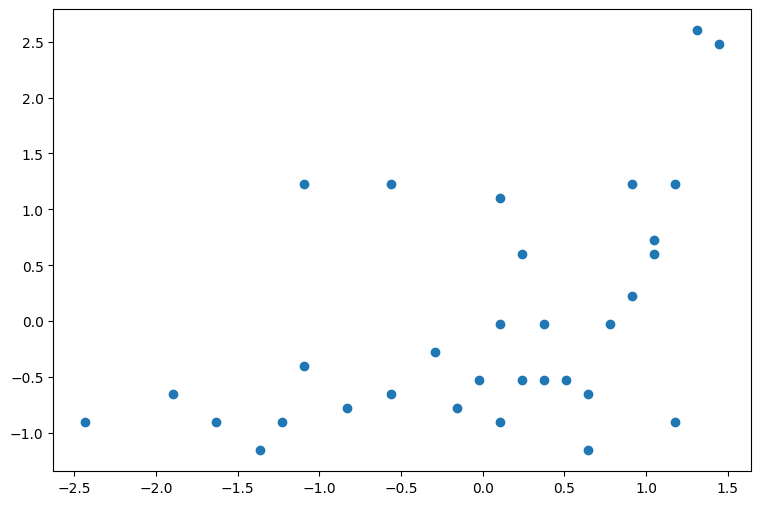

In [40]:
import matplotlib.pyplot as plt
plt.plot(XN[0,:],XN[1,:],'o')

In [79]:
np.shape(Y)[1]

1

In [77]:
W1=[[0.05,-0.03],[0.02,0.01],[-0.01,-0.02]]
W1=np.reshape(W1,(3,2))
print(np.shape(W1))
b1=[0.2,0.1,-0.1]
b1=np.reshape(b1,(3,1))
print(np.shape(b1))
W2=[0.01,0.02,0.03]
W2=np.reshape(W2,(1,3))
print(np.shape(W2))
b2=0.1

(3, 2)
(3, 1)
(1, 3)


In [78]:
Z1=np.dot(W1,X)+b1
print(Z1)
A1=relu(Z1)
print(A1)

Z2=np.dot(W2,A1)+b2
print(Z2)
A2=logistic.cdf(Z2)
print(A2)

ValueError: shapes (3,2) and (100000,7) not aligned: 2 (dim 1) != 100000 (dim 0)

In [44]:
dZ2=A2-Y
print(dZ2)
dW2=1/np.shape(Y)[1]*np.dot(dZ2,A1.T)
print(dW2)
np.shape(dW2)
db2=1/np.shape(Y)[1]*np.sum(dZ2)
print(db2)


[[-0.47347493  0.52517868  0.52662479  0.52769662 -0.47340014  0.52565246
  -0.47277695  0.52557765 -0.47225353  0.52794585  0.52602646  0.52557765
   0.52612618 -0.47325056 -0.47250277  0.52762185  0.52607632  0.52620098
   0.5263007   0.52664972 -0.47302621 -0.47245292 -0.47267725  0.52729783
   0.52764677 -0.47182986  0.52632563  0.52617605  0.52602646  0.52527843
   0.52577713  0.52595166]]
[[-0.02809363  0.02306586  0.01588466]]
0.21412783570583696


In [45]:
dZ1=np.multiply(np.dot(W2.T,dZ2),(relud(Z1)))
print(dZ1)
np.shape(dZ1)
dW1=1/np.shape(Y)[1]*np.dot(dZ1,X.T)
print(dW1)
np.shape(dW1)
db1=1/np.shape(Y)[1]*np.sum(dZ1)
print(db1)

[[-0.00473475  0.          0.          0.00527697 -0.004734    0.00525652
  -0.00472777  0.         -0.00472254  0.00527946  0.          0.00525578
   0.00526126 -0.00473251 -0.00472503  0.00527622  0.00526076  0.00526201
   0.00526301  0.0052665  -0.00473026 -0.00472453 -0.00472677  0.00527298
   0.00527647 -0.0047183   0.          0.          0.          0.
   0.00525777  0.        ]
 [-0.0094695   0.01050357  0.          0.01055393 -0.009468    0.
  -0.00945554  0.01051155 -0.00944507  0.01055892  0.01052053  0.01051155
   0.01052252 -0.00946501 -0.00945006  0.01055244  0.01052153  0.01052402
   0.01052601  0.01053299 -0.00946052 -0.00944906 -0.00945354  0.01054596
   0.01055294 -0.0094366   0.          0.          0.          0.
   0.          0.        ]
 [-0.          0.          0.01579874  0.         -0.014202    0.01576957
  -0.          0.         -0.          0.          0.          0.
   0.01578379 -0.         -0.          0.          0.          0.
   0.          0.       

In [46]:
lr=0.01 #learning rate
W1=W1-lr*dW1
b1=b1-lr*db1
W2=W2-lr*dW2
b2=b2-lr*db2
print(W1,b1)
print(W2,b2)
print(dZ2)

[[ 0.05001424 -0.03011406]
 [ 0.02003173  0.00964048]
 [-0.00956898 -0.01979968]] [[ 0.19994134]
 [ 0.09994134]
 [-0.10005866]]
[[0.01028094 0.01976934 0.02984115]] 0.09785872164294164
[[-0.47347493  0.52517868  0.52662479  0.52769662 -0.47340014  0.52565246
  -0.47277695  0.52557765 -0.47225353  0.52794585  0.52602646  0.52557765
   0.52612618 -0.47325056 -0.47250277  0.52762185  0.52607632  0.52620098
   0.5263007   0.52664972 -0.47302621 -0.47245292 -0.47267725  0.52729783
   0.52764677 -0.47182986  0.52632563  0.52617605  0.52602646  0.52527843
   0.52577713  0.52595166]]


# Iterations

In [110]:
lr=0.001

In [125]:
#Y = [Y]

print(W1.shape)
print(X.shape)

for i in range(10000):
    Z1=np.dot(W1,X)+b1
    #print(Z1)
    A1=relu(Z1)
    #print(A)

    Z2=np.dot(W2,A1)+b2
    #print(Z2)
    A2=logistic.cdf(Z2)
    #print(A2)

    dZ2=A2-Y
    #print(dZ2)
    dW2=1/np.shape(Y)[1]*np.dot(dZ2,A1.T)
    #print(dW2)
    np.shape(dW2)
    db2=1/np.shape(Y)[1]*np.sum(dZ2)
    #print(db2)

    dZ1=np.multiply(np.dot(W2.T,dZ2),(relud(Z1)))
    #print(dZ1)
    np.shape(dZ1)
    dW1=1/np.shape(Y)[1]*np.dot(dZ1,X.T)
    #print(dW1)
    np.shape(dW1)
    db1=1/np.shape(Y)[1]*np.sum(dZ1)
    #print(db1)

    #lr=0.01 #learning rate
    W1=W1-lr*dW1
    b1=b1-lr*db1
    W2=W2-lr*dW2
    b2=b2-lr*db2
    #print(W1,b1)
    #print(W2,b2)


(20, 7)
(7, 1000)


ValueError: operands could not be broadcast together with shapes (20,1000) (20,7) 

In [49]:
A2

array([[0.79838218, 0.01327483, 0.01327483, 0.01618056, 0.97902622,
        0.01327483, 0.99983077, 0.01327483, 0.25955831, 0.05761033,
        0.01327483, 0.01327483, 0.24539806, 0.96517132, 0.90712479,
        0.36832797, 0.08791864, 0.01327483, 0.01327483, 0.07164001,
        0.99487005, 0.99999953, 0.96356771, 0.04995525, 0.45635144,
        1.        , 0.01327483, 0.01327483, 0.01327483, 0.01327483,
        0.01327483, 0.01327483]])

In [50]:
A2-Y

array([[-2.01617823e-01,  1.32748283e-02,  1.32748283e-02,
         1.61805631e-02, -2.09737834e-02,  1.32748283e-02,
        -1.69231400e-04,  1.32748283e-02, -7.40441691e-01,
         5.76103326e-02,  1.32748283e-02,  1.32748283e-02,
         2.45398062e-01, -3.48286764e-02, -9.28752080e-02,
         3.68327970e-01,  8.79186378e-02,  1.32748283e-02,
         1.32748283e-02,  7.16400111e-02, -5.12995301e-03,
        -4.71331033e-07, -3.64322862e-02,  4.99552474e-02,
         4.56351436e-01, -3.72390185e-09,  1.32748283e-02,
         1.32748283e-02,  1.32748283e-02,  1.32748283e-02,
         1.32748283e-02,  1.32748283e-02]])

In [51]:
np.mean(abs(A2-Y))

0.08349059323122854

L(y',y) = - (y*log(y') + (1-y)*log(1-y'))

In [52]:
def loss(a,y):
   return - (y*np.log(a) + (1-y)*np.log(1-a))

In [53]:
loss(0.8,1)

0.2231435513142097

In [54]:
np.average(loss(A2,Y))

0.11253876657903963

In [56]:
Xe = [[9], # temperatura e vento
    [10]]
Xe=np.array(Xe)
Z1e=np.dot(W1,Xe)+b1
#print(Z1)
A1e=relu(Z1e)
#print(A)

Z2e=np.dot(W2,A1e)+b2
#print(Z2)
A2e=logistic.cdf(Z2e)
print(A2e)

[[0.25959457]]


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
import scipy.stats
import seaborn as sns
from scipy.stats import norm

In [98]:
print('RMSE: ',np.sqrt(mean_squared_error(Y,A2)))
print('MAE: ',np.sqrt(mean_absolute_error(Y,A2)))
print('MAPE: ', mean_absolute_percentage_error(Y,A2))

RMSE:  0.22917907918184802
MAE:  0.32406949242716226
MAPE:  230642712773754.94


# 